This is something I'm familiar with. Maximising returns and minimising volatility within the bounds of certain constraints.

Example problem:
2 securities, x and y.
We want to find the number of units to invest for every 3 units of x and 2 units of y, such that total number of units is maximised.

Maximise f(x,y) = 3x+2y

Constraints:
<li>2x + y <= 100</li>
<li>x + y <= 80</li>
<li>x <= 40</li>
<li>x >= 0</li>
<li>y >= 0</li>

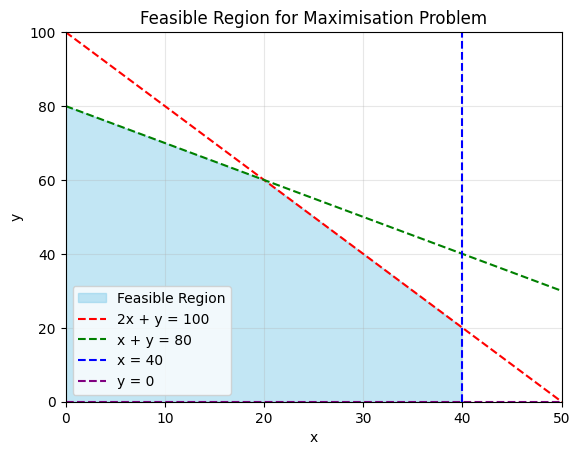

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 100, 500)
y1 = 100 - 2 * x  # 2x + y <= 100
y2 = 80 - x       # x + y <= 80
y3 = np.full_like(x, 0)  # y >= 0
y_min = np.maximum(0, np.minimum(y1, y2))
plt.fill_between(x, y_min, 0, where=(y_min >= 0) & (x <= 40), color='skyblue', alpha=0.5, label='Feasible Region')

plt.plot(x, y1, label='2x + y = 100', linestyle='--', color='red')
plt.plot(x, y2, label='x + y = 80', linestyle='--', color='green')
plt.axvline(40, label='x = 40', linestyle='--', color='blue')
plt.axhline(0, label='y = 0', linestyle='--', color='purple')

plt.title('Feasible Region for Maximisation Problem')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [6]:
import pulp
x = pulp.LpVariable("x", lowBound=0)
y = pulp.LpVariable("y", lowBound=0)

problem = pulp.LpProblem("simple maximisation objective", pulp.LpMaximize)
problem += 3*x + 2*y, "objective function"
problem += 2*x + y <= 100, "constraint 1"
problem += x + y <= 80, "constraint 2"
problem += x <= 40, "constraint 3"
problem.solve()

for i in problem.variables():
    print(i.name, "=", i.varValue)

x = 20.0
y = 60.0


Linear programs can have 3 types of outcomes:
<li>Local optimal solution found , but not necessarily global optimal solution</li>
<li>Solution cannot be found - infeasible</li>
<li>If optimal solution is unbounded or infinite them the problem is unbounded</li>